# EJERCICIOS

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import min, max, avg, countDistinct, col, row_number,collect_list,unix_timestamp, from_unixtime, month, year, split, to_timestamp, udf,sum as _sum, hour
from pyspark.sql.window import Window
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,DoubleType,TimestampType
import seaborn as sns


In [159]:
spark = SparkSession.builder.master("local[*]").appName("pyspark_dataframes2").getOrCreate()
#spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

## EJERCICIO 0
En un documento word haz una lista de las diferentes operaciones con una breve descripción de lo que hace y un ejemplo de como se utiliza

## EJERCICIO 1
Realiza las siguientes operaciones:
* Carga el dataset de “data/stocks_price_final.csv” (usa el esquema que creaste en la anterior relación de ejercicios)
* Calcula el mínimo y máximo de date, open, close y adjusted
* Calcula la media de las variables open, close y adjusted por industria
* Genera un gráfico de líneas donde se muestre la media de open por industria para los 25 primeros registros
* Guarda en un archivo json una selección de datos

In [160]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, LongType, DateType

# Definir el esquema de forma declarativa
esquema_price = StructType([
    StructField("id", StringType(), True),
    StructField("symbol", StringType(), True),
    StructField("date", DateType(), True),
    StructField("open", FloatType(), True),
    StructField("high", FloatType(), True),
    StructField("low", FloatType(), True),
    StructField("close", FloatType(), True),
    StructField("volume", LongType(), True),
    StructField("adjusted", FloatType(), True),
    StructField("market.cap", StringType(), True),
    StructField("sector", StringType(), True),
    StructField("industry", StringType(), True),
    StructField("exchange", StringType(), True)
])

In [161]:
df_price = spark.read.csv("recursos/stocks_price_final.csv", header=True, schema=esquema_price)
df_price.show(5)

+---+------+----------+-----+------+------+-----+-------+--------+----------+-------------+--------------------+--------+
| id|symbol|      date| open|  high|   low|close| volume|adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+-----+------+------+-----+-------+--------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12| 54.0|  58.0|  51.0|52.75|7326300|   52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|52.75|54.355| 49.15|52.27|1025200|   52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.45|  56.0| 52.01| 55.2| 269900|    55.2|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.21|  60.9|55.423|56.78| 602800|   56.78|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.85| 62.27| 55.65| 62.0|1589600|    62.0|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+---+------+----------+-

25/02/13 20:02:54 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: id, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: id but found: 
CSV file: file:///home/iabd/Documentos/IABD/IABD/BIGDATA/Spark/recursos/stocks_price_final.csv


In [162]:
from pyspark.sql.functions import expr, avg, min, max, round, mean

df_price.select(min("date")).show()
df_price.select(max("date")).show()

+----------+
| min(date)|
+----------+
|2019-01-02|
+----------+

+----------+
| max(date)|
+----------+
|2020-07-22|
+----------+



In [163]:
df_price.select(min("open")).show()
df_price.select(max("open")).show()

+---------+
|min(open)|
+---------+
|    0.072|
+---------+

+-----------+
|  max(open)|
+-----------+
|1.6016818E8|
+-----------+



In [164]:
df_price.select(min("close")).show()
df_price.select(max("close")).show()

+----------+
|min(close)|
+----------+
|     0.071|
+----------+

+-----------+
| max(close)|
+-----------+
|1.5837659E8|
+-----------+



In [165]:
df_price.select(min("adjusted")).show()
df_price.select(max("adjusted")).show()

+-------------+
|min(adjusted)|
+-------------+
|    -1.230099|
+-------------+

+-------------+
|max(adjusted)|
+-------------+
|  1.5724939E8|
+-------------+



In [166]:
df_price.groupBy("industry").agg(mean("open").alias("mean_open")).show()

+--------------------+------------------+
|            industry|         mean_open|
+--------------------+------------------+
|Finance/Investors...| 5.134401791443934|
|Biotechnology: Bi...| 24.80808319217773|
|Other Specialty S...| 84.80718810495605|
|Other Consumer Se...| 43.67010744364806|
|        Water Supply| 40.58048307729203|
|               Banks| 21.44122961212158|
|Farming/Seeds/Mil...|27.740143444537836|
|Medical/Nursing S...| 71.03728952381898|
|Biotechnology: La...|102.15234117212717|
| Television Services|119.26427651404161|
|Automotive Afterm...|55.443736998423056|
|   Auto Parts:O.E.M.|36.212743512499074|
|Rental/Leasing Co...| 79.74401193967431|
|Medical Specialities| 55.37061249265245|
| Specialty Chemicals| 37.89684115677208|
|Computer Software...|   94.374674616784|
|Biotechnology: In...|34.646765457028344|
|    Power Generation|49.859077049967745|
|Property-Casualty...| 81.72814215150193|
|Real Estate Inves...|  42.4087313126734|
+--------------------+------------

In [167]:
df_price.groupBy("industry").agg(mean("close").alias("mean_close")).show()

+--------------------+------------------+
|            industry|        mean_close|
+--------------------+------------------+
|Finance/Investors...|  5.13663074735324|
|Biotechnology: Bi...| 24.80358715006997|
|Other Specialty S...| 84.80276551199054|
|Other Consumer Se...| 43.65868871111973|
|        Water Supply|40.584873748260975|
|               Banks| 21.44016833129883|
|Farming/Seeds/Mil...| 27.74297949601548|
|Medical/Nursing S...| 71.09947780813135|
|Biotechnology: La...|102.28519780657979|
| Television Services| 119.4653019991688|
|Automotive Afterm...|55.477602465430806|
|   Auto Parts:O.E.M.|36.206599280109515|
|Rental/Leasing Co...| 79.74257699316557|
|Medical Specialities|55.362593693202804|
| Specialty Chemicals| 37.88893534061168|
|Computer Software...|  94.4974100660845|
|Biotechnology: In...|34.685822267167026|
|    Power Generation| 49.88114417163656|
|Property-Casualty...| 81.74267806146392|
|Real Estate Inves...|42.400397053426026|
+--------------------+------------

In [173]:
df_price.groupBy("industry").agg(mean("adjusted").alias("mean_adjusted")).show()

+--------------------+-------------+
|            industry|mean_adjusted|
+--------------------+-------------+
|Finance/Investors...|        4.991|
|Biotechnology: Bi...|       24.745|
|Other Specialty S...|       84.555|
|Other Consumer Se...|       43.435|
|        Water Supply|       40.173|
|               Banks|       21.029|
|Farming/Seeds/Mil...|       27.023|
|Medical/Nursing S...|        70.78|
|Biotechnology: La...|       102.24|
| Television Services|      119.105|
|Automotive Afterm...|       55.106|
|   Auto Parts:O.E.M.|       35.652|
|Rental/Leasing Co...|       79.301|
|Medical Specialities|       55.055|
| Specialty Chemicals|       37.592|
|Computer Software...|       94.368|
|Biotechnology: In...|       34.685|
|    Power Generation|       48.728|
|Property-Casualty...|       80.788|
|Real Estate Inves...|        40.89|
+--------------------+-------------+
only showing top 20 rows



In [ ]:
df_price

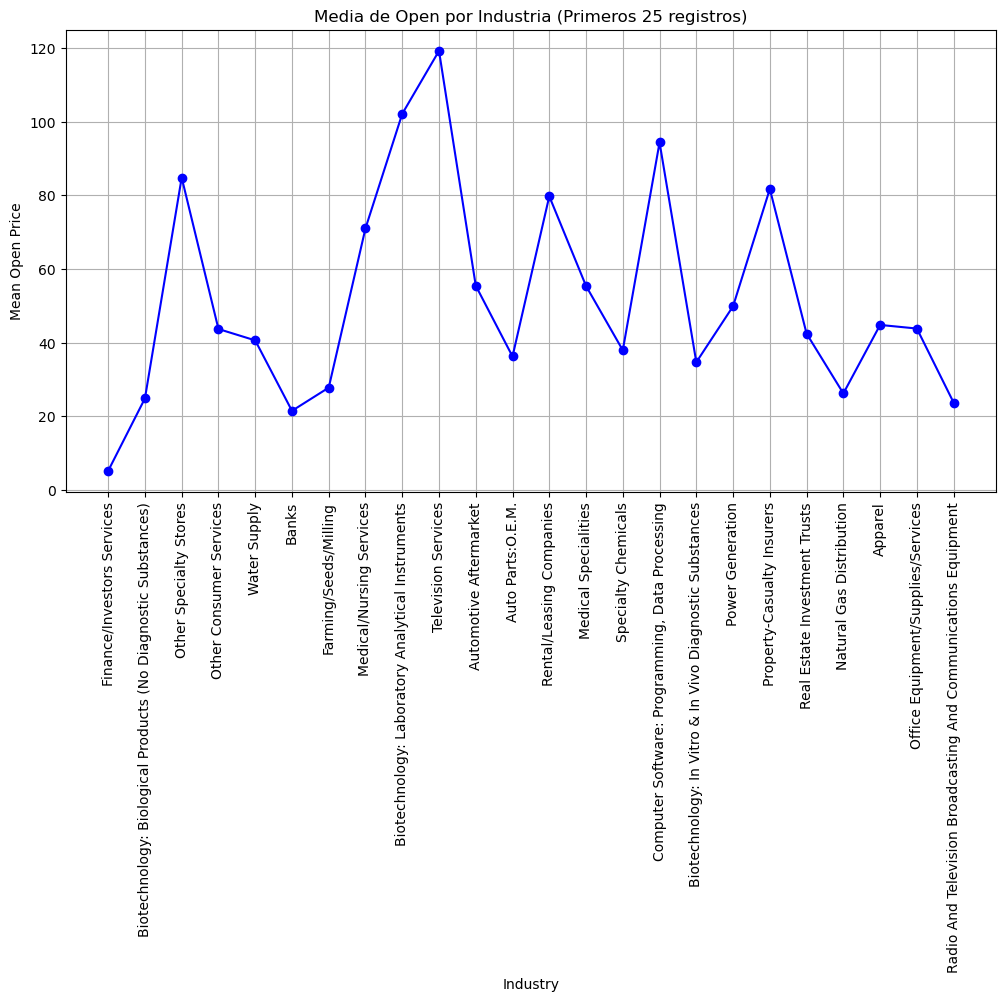

In [178]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por industria y calcular la media de open
df_open_mean = df_price.groupBy("industry").agg(round(mean("open"),2).alias("mean_open")).limit(24).toPandas()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_open_mean["industry"], df_open_mean["mean_open"], marker='o', linestyle='-', color='b')

# Personalizar el gráfico
plt.xlabel("Industry")
plt.ylabel("Mean Open Price")
plt.title("Media de Open por Industria (Primeros 25 registros)")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [117]:
df_price.groupBy("industry").agg(mean("open").alias("mean_open")).limit(25).toPandas().to_json("salida.json", orient="records", indent=4)

## EJERCICIO 2

 Sobre las movies.tsv (importa el tsv sin esquema, pero añade los nombres de la columnas al cargar el tsv):

1. ¿Cuantas películas diferentes hay? Usando sql y sin usar sql.
2. ¿En cuantas películas ha trabajado Murphy, Eddie (I)? Usando sql y sin usar sql.
3. ¿Cuáles son los actores que han aparecido en más de 30 películas? Usando sql y sin usar sql.
4. ¿En que película anterior a 1980 aparecen al menos 25 intérpretes? Usando sql y sin usar sql.
5. Muestra la cantidad de películas producidas cada año (solo debe mostrar el año y la cantidad), ordenando el listado por la cantidad de forma descendente. Usando sql y sin usar sql.
6. A partir de la consulta anterior, crea un gráfico de barras que muestre el año y la cantidad de películas, ordenados por fecha.

In [118]:
# Definir los nombres de las columnas
columnas = ["interprete", "pelicula", "anyo"]

# Cargar el archivo TSV sin esquema, pero con nombres de columnas
df_movies = spark.read.option("header", False).option("sep", "\t").csv("recursos/movies.tsv").toDF(*columnas)

# Mostrar los datos cargados
df_movies.show(truncate=False)

+-----------------+---------------------------+----+
|interprete       |pelicula                   |anyo|
+-----------------+---------------------------+----+
|McClure, Marc (I)|Freaky Friday              |2003|
|McClure, Marc (I)|Coach Carter               |2005|
|McClure, Marc (I)|Superman II                |1980|
|McClure, Marc (I)|Apollo 13                  |1995|
|McClure, Marc (I)|Superman                   |1978|
|McClure, Marc (I)|Back to the Future         |1985|
|McClure, Marc (I)|Back to the Future Part III|1990|
|Cooper, Chris (I)|Me, Myself & Irene         |2000|
|Cooper, Chris (I)|October Sky                |1999|
|Cooper, Chris (I)|Capote                     |2005|
|Cooper, Chris (I)|The Bourne Supremacy       |2004|
|Cooper, Chris (I)|The Patriot                |2000|
|Cooper, Chris (I)|The Town                   |2010|
|Cooper, Chris (I)|Seabiscuit                 |2003|
|Cooper, Chris (I)|A Time to Kill             |1996|
|Cooper, Chris (I)|Where the Wild Things Are  

In [ ]:
# Crear una vista temporal del DataFrame
df_movies.createOrReplaceTempView("movies")

# Ejecutar la consulta SQL
consulta_sql1 = spark.sql("""
    SELECT COUNT(*) AS num_peliculas
    FROM movies
    WHERE interprete = 'Murphy, Eddie (I)'
""")

# Mostrar el resultado
consulta_sql1.show()


+-------------+
|num_peliculas|
+-------------+
|           21|
+-------------+



In [120]:
from pyspark.sql.functions import col

# Filtrar por el intérprete y contar las filas
num_peliculas_eddie=df_movies.filter(col("interprete") == "Murphy, Eddie (I)").count()
# Mostrar el resultado
print(f"Murphy, Eddie (I) ha trabajado en {num_peliculas_eddie} películas.")


Murphy, Eddie (I) ha trabajado en 21 películas.


In [ ]:
# Filtrar por el intérprete y contar las filas SQL
consulta_sql2 = spark.sql("""
    SELECT interprete, COUNT(*) AS num_peliculas
    FROM movies
    GROUP BY interprete
    HAVING num_peliculas > 30
    ORDER BY num_peliculas DESC
""")

# Mostrar el resultado
consulta_sql2.show()

+------------------+-------------+
|        interprete|num_peliculas|
+------------------+-------------+
|  Tatasciore, Fred|           38|
|     Welker, Frank|           38|
|Jackson, Samuel L.|           32|
|     Harnell, Jess|           31|
+------------------+-------------+



In [ ]:
from pyspark.sql.functions import count

# Contar las películas por actor y filtrar aquellos con más de 30 películas
df_actores = (
    df_movies.groupBy("interprete")
    .agg(count("*").alias("num_peliculas"))
    .filter(col("num_peliculas") > 30)
    .orderBy(col("num_peliculas").desc())
)

# Mostrar el resultado
df_actores.show()


+------------------+-------------+
|        interprete|num_peliculas|
+------------------+-------------+
|  Tatasciore, Fred|           38|
|     Welker, Frank|           38|
|Jackson, Samuel L.|           32|
|     Harnell, Jess|           31|
+------------------+-------------+



In [123]:
# # Contar las películas por actor y filtrar aquellos con más de 30 películas SQL
consulta_sql3 = spark.sql("""
    SELECT pelicula, COUNT(DISTINCT interprete) AS num_interpretes
    FROM movies
    WHERE anyo < 1980
    GROUP BY pelicula
    HAVING num_interpretes >= 25
    ORDER BY num_interpretes DESC
""")

# Mostrar el resultado
consulta_sql3.show()

+---------+---------------+
| pelicula|num_interpretes|
+---------+---------------+
|Star Wars|             25|
+---------+---------------+



In [ ]:
from pyspark.sql.functions import countDistinct

# Filtrar las películas anteriores a 1980 y contar los intérpretes únicos
df_peliculas = (
    df_movies.filter(col("anyo") < 1980)
    .groupBy("pelicula")
    .agg(countDistinct("interprete").alias("num_intérpretes"))
    .filter(col("num_intérpretes") >= 25)
    .orderBy(col("num_intérpretes").desc())
)

# Mostrar el resultado
df_peliculas.show()


+---------+---------------+
| pelicula|num_intérpretes|
+---------+---------------+
|Star Wars|             25|
+---------+---------------+



In [125]:
#Contar el número de películas por año SQl
consulta_sql4= spark.sql("""
    SELECT anyo, COUNT(DISTINCT pelicula) AS num_peliculas
    FROM movies
    GROUP BY anyo
    ORDER BY num_peliculas DESC
""")
consulta_sql4.show()

+----+-------------+
|anyo|num_peliculas|
+----+-------------+
|2006|           86|
|2004|           86|
|2011|           86|
|2005|           85|
|2008|           82|
|2002|           81|
|2010|           78|
|2000|           77|
|2003|           76|
|2007|           75|
|2001|           71|
|2009|           68|
|1999|           67|
|1997|           66|
|1998|           59|
|1996|           42|
|2012|           32|
|1995|           25|
|1994|           16|
|1986|           16|
+----+-------------+
only showing top 20 rows



In [126]:
# Contar cuantas peliculas se han hecho por año
df_peliculas_anyo = (
    df_movies.groupBy("anyo")
    .agg(countDistinct("pelicula").alias("num_peliculas"))
    .orderBy(col("num_peliculas").desc())
)

# Mostrar el resultado
df_peliculas_anyo.show()

+----+-------------+
|anyo|num_peliculas|
+----+-------------+
|2006|           86|
|2004|           86|
|2011|           86|
|2005|           85|
|2008|           82|
|2002|           81|
|2010|           78|
|2000|           77|
|2003|           76|
|2007|           75|
|2001|           71|
|2009|           68|
|1999|           67|
|1997|           66|
|1998|           59|
|1996|           42|
|2012|           32|
|1995|           25|
|1994|           16|
|1986|           16|
+----+-------------+
only showing top 20 rows



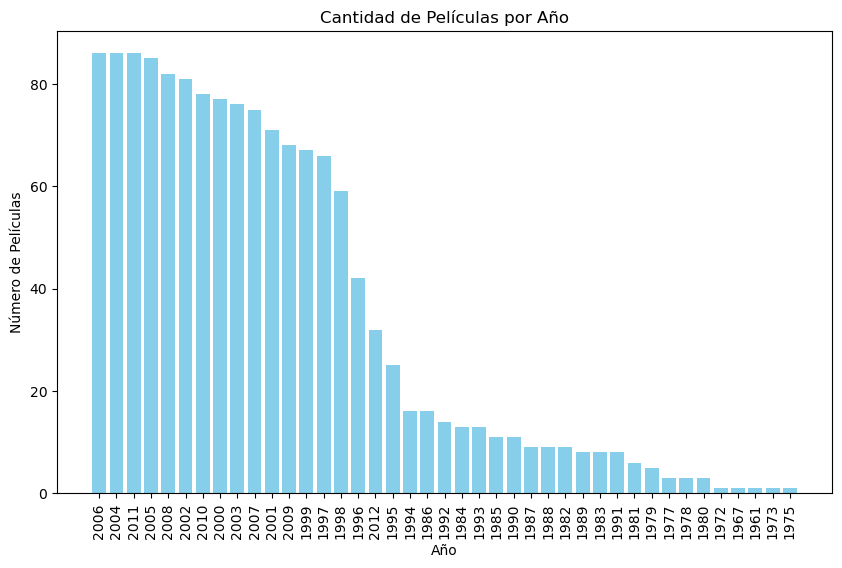

In [127]:
import matplotlib.pyplot as plt

# Recoger los datos de la consulta
data = df_peliculas_anyo.collect()

# Extraer los años y la cantidad de películas
años = [row['anyo'] for row in data]
num_peliculas = [row['num_peliculas'] for row in data]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(años, num_peliculas, color='skyblue')

# Añadir título y etiquetas
plt.title('Cantidad de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')

# Mostrar el gráfico
plt.xticks(rotation=90)  # Para mejorar la visualización de los años
plt.show()


## EJERCICIO 3

Nos han enviado un nuevo archivo llamado movie-ratings.tsv que contiene las calificaciones de las películas.

1. Crea un DataFrame que contenga los datos de ambos datasets. Usando sql y sin usar sql
2. Muestra para cada año, la película con mayor puntuación (año, título de la película, puntuación). Investiga que es Window Functions en Spark y utilizalas para devolver lo que se pide.
3. Sobre los datos anteriores, obtén también una lista con los nombres de los intérpretes. 
4. Averigua las tres parejas de intérpretes han trabajado juntos en más ocasiones. La salida debe tener tres columnas: interprete1, interprete2 y cantidad (necesitas utilizar un self-join).

In [ ]:
#Crear un DataFrame con los datos del archivo movie-ratings.tsv
columnas= ["puntuacion","pelicula","anyo"]

df_movies_ratings = spark.read.option("header", True).option("sep", "\t").csv("recursos/movie-ratings.tsv").toDF(*columnas)
df_movies_ratings.show(5)

+----------+--------------------+----+
|puntuacion|            pelicula|anyo|
+----------+--------------------+----+
|    7.6177|                  10|1979|
|    1.2864|10 Things I Hate ...|1999|
|    0.3243|           10,000 BC|2008|
|    0.3376|      101 Dalmatians|1996|
|    0.5218|      102 Dalmatians|2000|
+----------+--------------------+----+
only showing top 5 rows



In [ ]:
#Union de los dos dataframes
df_union_movies= df_movies.join(df_movies_ratings, on=["pelicula","anyo"], how="inner")
df_union_movies.show(5)

+-------------+----+-----------------+----------+
|     pelicula|anyo|       interprete|puntuacion|
+-------------+----+-----------------+----------+
|Freaky Friday|2003|McClure, Marc (I)|    0.3847|
| Coach Carter|2005|McClure, Marc (I)|    0.9858|
|  Superman II|1980|McClure, Marc (I)|    0.8739|
|    Apollo 13|1995|McClure, Marc (I)|    1.0267|
|     Superman|1978|McClure, Marc (I)|    1.1982|
+-------------+----+-----------------+----------+
only showing top 5 rows



In [130]:
# Crear las vistas temporales
df_movies.createOrReplaceTempView("movies")
df_movies_ratings.createOrReplaceTempView("movies_ratings")

# Ejecutar la consulta SQL para hacer el JOIN
df_union_movies_sql = spark.sql("""
    SELECT m.*, r.puntuacion
    FROM movies m
    INNER JOIN movies_ratings r
    ON m.pelicula = r.pelicula AND m.anyo = r.anyo
""")

# Mostrar el resultado
df_union_movies_sql.show(5)

+-----------------+-------------+----+----------+
|       interprete|     pelicula|anyo|puntuacion|
+-----------------+-------------+----+----------+
|McClure, Marc (I)|Freaky Friday|2003|    0.3847|
|McClure, Marc (I)| Coach Carter|2005|    0.9858|
|McClure, Marc (I)|  Superman II|1980|    0.8739|
|McClure, Marc (I)|    Apollo 13|1995|    1.0267|
|McClure, Marc (I)|     Superman|1978|    1.1982|
+-----------------+-------------+----+----------+
only showing top 5 rows



In [131]:
from pyspark.sql.window import Window

# Definir la ventana para particionar por "año" y ordenar por "puntuacion" de forma descendente
ventana = Window.partitionBy("anyo").orderBy(col("puntuacion").desc())

# Crear una nueva columna "numero_fila" que asigna un número de fila basado en la ventana
df_con_numero_fila = df_union_movies.withColumn("numero_fila", row_number().over(ventana))

# Filtrar para obtener solo la película con la mayor puntuación por año
df_max_puntuacion_por_año = df_con_numero_fila.filter(col("numero_fila") == 1)

# Seleccionar las columnas deseadas (año, título de la película, puntuación)
df_max_puntuacion_por_año = df_max_puntuacion_por_año.select("anyo", "pelicula", "puntuacion")

# Mostrar el resultado
df_max_puntuacion_por_año.show()


+----+--------------------+----------+
|anyo|            pelicula|puntuacion|
+----+--------------------+----------+
|1961|One Hundred and O...|    0.6726|
|1967|     The Jungle Book|    1.3485|
|1972|       The Godfather|    0.5099|
|1973|        The Exorcist|    0.6581|
|1975|                Jaws|     0.701|
|1977|Saturday Night Fever|    1.2184|
|1978|              Jaws 2|    1.9793|
|1979|      Apocalypse Now|    1.9906|
|1980|         Superman II|    0.8739|
|1981|   Absence of Malice|    2.1052|
|1982|         First Blood|    1.2501|
|1983|               Yentl|    1.4011|
|1984|      The Terminator|     2.061|
|1985|Kiss of the Spide...|       2.1|
|1986|    An American Tail|   14.2122|
|1987|           Mannequin|    1.8974|
|1988|        Child's Play|    1.7632|
|1989|     Lethal Weapon 2|    1.7087|
|1990|   Presumed Innocent|    2.0055|
|1991|                 JFK|    2.0171|
+----+--------------------+----------+
only showing top 20 rows



In [ ]:
# Agrupar por año y película para obtener una lista de los intérpretes
df_agregado = df_union_movies.groupBy("anyo", "pelicula", "puntuacion").agg(
    collect_list("interprete").alias("intérpretes")
)

# Definir la ventana para particionar por "año" y ordenar por "puntuacion" de forma descendente
ventana = Window.partitionBy("anyo").orderBy(col("puntuacion").desc())

# Crear la columna "numero_fila" para identificar la película con mayor puntuación en cada año
df_con_numero_fila = df_agregado.withColumn("numero_fila", row_number().over(ventana))

# Filtrar para obtener solo la película con la mayor puntuación por año
df_max_puntuacion_por_año = df_con_numero_fila.filter(col("numero_fila") == 1)

# Mostrar el resultado
df_max_puntuacion_por_año.select("anyo", "pelicula", "puntuacion", "intérpretes").show(truncate=False)


+----+------------------------------+----------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|anyo|pelicula                      |puntuacion|intérpretes                                                      

In [133]:
# Realizar el self-join en el DataFrame para obtener todas las combinaciones de intérpretes
df_self_join = df_movies.alias("df1").join(
    df_movies.alias("df2"),
    (col("df1.pelicula") == col("df2.pelicula")) & 
    (col("df1.interprete") < col("df2.interprete")),  # Para evitar duplicados y el self-join
    how="inner"
)

# Contar cuántas veces ha trabajado cada pareja de intérpretes juntos
df_parejas = df_self_join.groupBy("df1.interprete", "df2.interprete") \
    .agg(count("df1.pelicula").alias("cantidad")) \
    .orderBy(col("cantidad").desc())

# Mostrar las tres primeras parejas con más ocasiones de haber trabajado juntos
df_parejas.show()


+-----------------+------------------+--------+
|       interprete|        interprete|cantidad|
+-----------------+------------------+--------+
| Lynn, Sherry (I)|   McGowan, Mickie|      23|
|  Bergen, Bob (I)|   McGowan, Mickie|      19|
|  Bergen, Bob (I)|  Lynn, Sherry (I)|      19|
|  Angel, Jack (I)|   McGowan, Mickie|      17|
|  Angel, Jack (I)|  Lynn, Sherry (I)|      17|
|  McGowan, Mickie|       Rabson, Jan|      16|
| Lynn, Sherry (I)|       Rabson, Jan|      16|
|Darling, Jennifer|   McGowan, Mickie|      15|
|    Harnell, Jess|   McGowan, Mickie|      14|
| Farmer, Bill (I)|   McGowan, Mickie|      14|
|Darling, Jennifer|  Lynn, Sherry (I)|      14|
|Sandler, Adam (I)|Schneider, Rob (I)|      14|
|  Bergen, Bob (I)|     Harnell, Jess|      14|
|  Bergen, Bob (I)|       Rabson, Jan|      14|
|    Harnell, Jess|  Lynn, Sherry (I)|      13|
| Farmer, Bill (I)|  Lynn, Sherry (I)|      13|
|  Bergen, Bob (I)|   Bumpass, Rodger|      13|
|  Angel, Jack (I)|   Bergen, Bob (I)|  

## EJERCICIO 4

Hemos recibido un dataset con las ventas de 2019 de una tienda americana de productos de tecnología, mediante un conjunto de ficheros en formato CSV comprimidos en salesdata.zip.

1. Una vez descomprimidos los datos, crea un DataFrame con todos los datos, infiriendo el esquema.
2. Vuelve a realizar la lectura de los datos pero con el siguiente esquema:

    ``````
    from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType
    esquema = StructType([
        StructField("Order ID", IntegerType(), False),
        StructField("Product", StringType(), False),
        StructField("Quantity Ordered", IntegerType(), True),
        StructField("Price Each", DoubleType(), False),
        StructField("Order Date", StringType(), False),
        StructField("Purchase Address", StringType(), False)
    ])
    ``````
3. Tras la lectura, vamos a realizar la limpieza de datos. El primer paso será renombrar la columnas para eliminar los espacios en blanco.
4. Elimina las filas que contengan algún campo nulo.
5. Comprueba si las cabeceras de los archivos aparecen como datos del dataset (por ejemplo, un producto cuyo nombre sea Product). Si fuera el caso, elimina dichas filas.
6. A partir del campo dirección, crea dos nuevas columnas para almacenar la ciudad (City) y el estado (State). Por ejemplo, para la dirección 136 Church St, New York City, NY 10001, la ciudad es New York City y el estado es NY.
7. Modifica el campo con la fecha del pedido para que su formato sea timestamp.
8. Sobre el campo anterior, crea dos nuevas columnas, con el mes (Month) y el año (Year) del pedido.
9. Crea una nueva columan (precio_final) muestre el precio con descuento: un 10% de descuento si la cantidad es mayor que 1 y un 5% si es uno (hazlo definiendo tu propia función de usuario). Hazlo sin sql y con sql.

In [134]:
from functools import reduce
from pyspark.sql import DataFrame

# Lista con los meses del año
meses = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# Leer los archivos y almacenar los DataFrames en una lista
df_list = [spark.read.csv(f"recursos/salesdata/Sales_{mes}_2019.csv", header=True, inferSchema=True) for mes in meses]

# Unir todos los DataFrames en uno solo
df_ventas_2019 = reduce(DataFrame.union, df_list)

# Mostrar las primeras filas
df_ventas_2019.show(5)


+--------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  141234|              iPhone|               1|     700.0|01/22/19 21:25|944 Walnut St, Bo...|
|  141235|Lightning Chargin...|               1|     14.95|01/28/19 14:15|185 Maple St, Por...|
|  141236|    Wired Headphones|               2|     11.99|01/17/19 13:33|538 Adams St, San...|
|  141237|    27in FHD Monitor|               1|    149.99|01/05/19 20:33|738 10th St, Los ...|
|  141238|    Wired Headphones|               1|     11.99|01/25/19 11:59|387 10th St, Aust...|
+--------+--------------------+----------------+----------+--------------+--------------------+
only showing top 5 rows



In [135]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType
esquema = StructType([
        StructField("Order ID", IntegerType(), False),
        StructField("Product", StringType(), False),
        StructField("Quantity Ordered", IntegerType(), True),
        StructField("Price Each", DoubleType(), False),
        StructField("Order Date", StringType(), False),
        StructField("Purchase Address", StringType(), False)
    ])

In [136]:
# Lista con los meses del año
meses = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# Leer los archivos y almacenar los DataFrames en una lista
df_list = [spark.read.csv(f"recursos/salesdata/Sales_{mes}_2019.csv", header=True, schema=esquema) for mes in meses]

# Unir todos los DataFrames en uno solo
df_ventas_2019 = reduce(DataFrame.union, df_list)

# Mostrar las primeras filas
df_ventas_2019.show(5)


+--------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  141234|              iPhone|               1|     700.0|01/22/19 21:25|944 Walnut St, Bo...|
|  141235|Lightning Chargin...|               1|     14.95|01/28/19 14:15|185 Maple St, Por...|
|  141236|    Wired Headphones|               2|     11.99|01/17/19 13:33|538 Adams St, San...|
|  141237|    27in FHD Monitor|               1|    149.99|01/05/19 20:33|738 10th St, Los ...|
|  141238|    Wired Headphones|               1|     11.99|01/25/19 11:59|387 10th St, Aust...|
+--------+--------------------+----------------+----------+--------------+--------------------+
only showing top 5 rows



In [ ]:
# Renombrar las columnas para eliminar los espacios en blanco
df_ventas_2019 = df_ventas_2019.toDF(*[col_name.replace(" ", "") for col_name in df_ventas_2019.columns])

# Mostrar las primeras 5 filas para verificar
df_ventas_2019.show(5)

+-------+--------------------+---------------+---------+--------------+--------------------+
|OrderID|             Product|QuantityOrdered|PriceEach|     OrderDate|     PurchaseAddress|
+-------+--------------------+---------------+---------+--------------+--------------------+
| 141234|              iPhone|              1|    700.0|01/22/19 21:25|944 Walnut St, Bo...|
| 141235|Lightning Chargin...|              1|    14.95|01/28/19 14:15|185 Maple St, Por...|
| 141236|    Wired Headphones|              2|    11.99|01/17/19 13:33|538 Adams St, San...|
| 141237|    27in FHD Monitor|              1|   149.99|01/05/19 20:33|738 10th St, Los ...|
| 141238|    Wired Headphones|              1|    11.99|01/25/19 11:59|387 10th St, Aust...|
+-------+--------------------+---------------+---------+--------------+--------------------+
only showing top 5 rows



In [ ]:
# Eliminar filas con cualquier campo nulo
df_ventas_2019_limpio = df_ventas_2019.dropna()

# Mostrar las primeras 5 filas para verificar
df_ventas_2019_limpio.show(5)

+-------+--------------------+---------------+---------+--------------+--------------------+
|OrderID|             Product|QuantityOrdered|PriceEach|     OrderDate|     PurchaseAddress|
+-------+--------------------+---------------+---------+--------------+--------------------+
| 141234|              iPhone|              1|    700.0|01/22/19 21:25|944 Walnut St, Bo...|
| 141235|Lightning Chargin...|              1|    14.95|01/28/19 14:15|185 Maple St, Por...|
| 141236|    Wired Headphones|              2|    11.99|01/17/19 13:33|538 Adams St, San...|
| 141237|    27in FHD Monitor|              1|   149.99|01/05/19 20:33|738 10th St, Los ...|
| 141238|    Wired Headphones|              1|    11.99|01/25/19 11:59|387 10th St, Aust...|
+-------+--------------------+---------------+---------+--------------+--------------------+
only showing top 5 rows



In [ ]:
# Filtrar las filas que tengan el valor "Product" en la columna "Product"
df_ventas_2019_limpio_product = df_ventas_2019_limpio.filter(df_ventas_2019_limpio["Product"] != "Product")

# Mostrar las primeras 5 filas para verificar que se eliminaron
df_ventas_2019_limpio_product.show(5)

+-------+--------------------+---------------+---------+--------------+--------------------+
|OrderID|             Product|QuantityOrdered|PriceEach|     OrderDate|     PurchaseAddress|
+-------+--------------------+---------------+---------+--------------+--------------------+
| 141234|              iPhone|              1|    700.0|01/22/19 21:25|944 Walnut St, Bo...|
| 141235|Lightning Chargin...|              1|    14.95|01/28/19 14:15|185 Maple St, Por...|
| 141236|    Wired Headphones|              2|    11.99|01/17/19 13:33|538 Adams St, San...|
| 141237|    27in FHD Monitor|              1|   149.99|01/05/19 20:33|738 10th St, Los ...|
| 141238|    Wired Headphones|              1|    11.99|01/25/19 11:59|387 10th St, Aust...|
+-------+--------------------+---------------+---------+--------------+--------------------+
only showing top 5 rows



In [ ]:
df_ventas_2019_limpio_product.select("PurchaseAddress").show(5, truncate=False)

+-------------------------------------+
|PurchaseAddress                      |
+-------------------------------------+
|944 Walnut St, Boston, MA 02215      |
|185 Maple St, Portland, OR 97035     |
|538 Adams St, San Francisco, CA 94016|
|738 10th St, Los Angeles, CA 90001   |
|387 10th St, Austin, TX 73301        |
+-------------------------------------+
only showing top 5 rows



In [141]:
from pyspark.sql.functions import col, split

# Crear la columna City extrayendo la segunda parte después de la primera coma
df_ventas_2019_limpio_address = df_ventas_2019_limpio_product.withColumn(
    "City", 
    split(col("PurchaseAddress"), ",").getItem(1)  # Obtener la ciudad (segunda parte después de la primera coma)
)

# Crear la columna State extrayendo la tercera parte después de la segunda coma, y tomando los primeros 2 caracteres del estado
df_ventas_2019_limpio_address = df_ventas_2019_limpio_address.withColumn(
    "State", 
    split(col("PurchaseAddress"), ",").getItem(2).substr(1, 3)  # Obtener el estado (tercer parte, tomando solo los primeros tres caracteres)
)

# Mostrar las primeras 5 filas para verificar los resultados
df_ventas_2019_limpio_address.select("PurchaseAddress", "City", "State").show(5, truncate=False)


+-------------------------------------+--------------+-----+
|PurchaseAddress                      |City          |State|
+-------------------------------------+--------------+-----+
|944 Walnut St, Boston, MA 02215      | Boston       | MA  |
|185 Maple St, Portland, OR 97035     | Portland     | OR  |
|538 Adams St, San Francisco, CA 94016| San Francisco| CA  |
|738 10th St, Los Angeles, CA 90001   | Los Angeles  | CA  |
|387 10th St, Austin, TX 73301        | Austin       | TX  |
+-------------------------------------+--------------+-----+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col, to_timestamp

# Convertir el campo OrderDate al formato timestamp
df_ventas_2019_limpio_address = df_ventas_2019_limpio_address.withColumn(
    "OrderDate", 
    to_timestamp(col("OrderDate"), "MM/dd/yy HH:mm") 
)

# Mostrar las primeras 5 filas para verificar los resultados
df_ventas_2019_limpio_address.select("OrderDate").show(5, truncate=False)



+-------------------+
|OrderDate          |
+-------------------+
|2019-01-22 21:25:00|
|2019-01-28 14:15:00|
|2019-01-17 13:33:00|
|2019-01-05 20:33:00|
|2019-01-25 11:59:00|
+-------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import month, year

# Crear las columnas Month y Year a partir de OrderDate
df_ventas_2019_limpio_address = df_ventas_2019_limpio_address.withColumn(
    "Month", 
    month(col("OrderDate"))  # Extraer el mes de OrderDate
)

df_ventas_2019_limpio_address = df_ventas_2019_limpio_address.withColumn(
    "Year", 
    year(col("OrderDate"))  # Extraer el año de OrderDate
)

# Mostrar las primeras 5 filas para verificar los resultados
df_ventas_2019_limpio_address.select("OrderDate", "Month", "Year").show(5, truncate=False)


+-------------------+-----+----+
|OrderDate          |Month|Year|
+-------------------+-----+----+
|2019-01-22 21:25:00|1    |2019|
|2019-01-28 14:15:00|1    |2019|
|2019-01-17 13:33:00|1    |2019|
|2019-01-05 20:33:00|1    |2019|
|2019-01-25 11:59:00|1    |2019|
+-------------------+-----+----+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Definir la UDF para calcular el precio con descuento
def calcular_descuento(cantidad, precio):
    if cantidad > 1:
        return precio * 0.90  # 10% de descuento
    else:
        return precio * 0.95  # 5% de descuento

# Registrar la UDF
udf_descuento = udf(calcular_descuento, FloatType())

# Aplicar la UDF al DataFrame para crear la nueva columna 'precio_final'
df_ventas_2019_limpio_address = df_ventas_2019_limpio_address.withColumn(
    "precio_final", 
    udf_descuento(col("QuantityOrdered"), col("PriceEach"))
)

# Mostrar las primeras 5 filas para verificar los resultados
df_ventas_2019_limpio_address.select("QuantityOrdered", "PriceEach", "precio_final").show(5, truncate=False)


+---------------+---------+------------+
|QuantityOrdered|PriceEach|precio_final|
+---------------+---------+------------+
|1              |700.0    |665.0       |
|1              |14.95    |14.2025     |
|2              |11.99    |10.791      |
|1              |149.99   |142.4905    |
|1              |11.99    |11.3905     |
+---------------+---------+------------+
only showing top 5 rows



In [ ]:
# Registrar el DataFrame como una vista temporal
df_ventas_2019_limpio_address.createOrReplaceTempView("ventas")

# Usar SQL para crear la columna 'precio_final' con descuento
df_precio_final_sql = spark.sql("""
    SELECT *,
           CASE 
               WHEN QuantityOrdered > 1 THEN PriceEach * 0.90  -- 10% de descuento
               ELSE PriceEach * 0.95  -- 5% de descuento
           END AS precio_final_calculado  -- Renombramos la columna para evitar ambigüedad
    FROM ventas
""")

# Mostrar las primeras 5 filas para verificar los resultados
df_precio_final_sql.select("QuantityOrdered", "PriceEach", "precio_final_calculado").show(5, truncate=False)


+---------------+---------+----------------------+
|QuantityOrdered|PriceEach|precio_final_calculado|
+---------------+---------+----------------------+
|1              |700.0    |665.0                 |
|1              |14.95    |14.202499999999999    |
|2              |11.99    |10.791                |
|1              |149.99   |142.4905              |
|1              |11.99    |11.3905               |
+---------------+---------+----------------------+
only showing top 5 rows



## EJERCICIO 5

Una vez realizada la transformación de los datos, vamos a realizar su carga y extraer información, utilizando Spark SQL siempre que sea posible:

1. Almacena los datos en formato Parquet en la carpeta salesoutput particionando los datos por año y mes. Tras ejecutar esta operación, comprueba en disco la estructura de archivos creada.
2. Sobre los datos almacenados, realiza una nueva lectura pero solo leyendo los datos de 2019 los cuales deberían estar almacenados en ./salesdataoutput/Year=2019.
3. Averigua cual ha sido el mes que ha recaudado más. Para ello, deberás multiplicar el precio por la cantidad de unidades, y posteriormente, realizar alguna agregación. Sobre el resultado, crea un gráfico de barras verticales para representar las ventas totales por mes
4. Obtén un gráfico de barras horizontales con las 10 ciudades que más unidades han vendido (ordenadas, la más larga arriba)
5. Obtén un gráfico de línea que represente la cantidad de pedidos por Horas en las que se ha realizado un pedido que contenía al menos dos productos.

In [147]:
# Guardar los datos en formato Parquet con partición por año y mes
df_precio_final_sql.write.partitionBy("Year", "Month").mode("overwrite").parquet("salesoutput")


25/02/13 18:51:28 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
25/02/13 18:51:28 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 84,44% for 9 writers
25/02/13 18:51:28 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 76,00% for 10 writers
25/02/13 18:51:28 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 69,09% for 11 writers
25/02/13 18:51:28 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 63,33% for 12 writers
25/02/13 18:51:29 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 69,09% for 11 writers
25/02/13 18:51:29 WARN MemoryManager: Total allocation exceeds 95,

In [148]:
ls -R salesoutput

salesoutput:
 _SUCCESS  'Year=2019'/  'Year=2020'/

'salesoutput/Year=2019':
'Month=1'/   'Month=11'/  'Month=2'/  'Month=4'/  'Month=6'/  'Month=8'/
'Month=10'/  'Month=12'/  'Month=3'/  'Month=5'/  'Month=7'/  'Month=9'/

'salesoutput/Year=2019/Month=1':
part-00000-180f34d3-ecb1-478a-90ce-d3003be5aacb.c000.snappy.parquet

'salesoutput/Year=2019/Month=10':
part-00008-180f34d3-ecb1-478a-90ce-d3003be5aacb.c000.snappy.parquet
part-00009-180f34d3-ecb1-478a-90ce-d3003be5aacb.c000.snappy.parquet

'salesoutput/Year=2019/Month=11':
part-00009-180f34d3-ecb1-478a-90ce-d3003be5aacb.c000.snappy.parquet
part-00010-180f34d3-ecb1-478a-90ce-d3003be5aacb.c000.snappy.parquet

'salesoutput/Year=2019/Month=12':
part-00010-180f34d3-ecb1-478a-90ce-d3003be5aacb.c000.snappy.parquet
part-00011-180f34d3-ecb1-478a-90ce-d3003be5aacb.c000.snappy.parquet

'salesoutput/Year=2019/Month=2':
part-00000-180f34d3-ecb1-478a-90ce-d3003be5aacb.c000.snappy.parquet
part-00001-180f34d3-ecb1-478a-90ce-d3003be5aacb.c000.snappy.

In [149]:
df_ventas_2019 = spark.read.parquet("salesoutput/Year=2019")

# Mostrar algunas filas para verificar la carga
df_ventas_2019.show(5)

+-------+--------------------+---------------+---------+-------------------+--------------------+--------------+-----+------------+----------------------+-----+
|OrderID|             Product|QuantityOrdered|PriceEach|          OrderDate|     PurchaseAddress|          City|State|precio_final|precio_final_calculado|Month|
+-------+--------------------+---------------+---------+-------------------+--------------------+--------------+-----+------------+----------------------+-----+
| 295665|  Macbook Pro Laptop|              1|   1700.0|2019-12-30 00:01:00|136 Church St, Ne...| New York City|   NY|      1615.0|                1615.0|   12|
| 295666|  LG Washing Machine|              1|    600.0|2019-12-29 07:03:00|562 2nd St, New Y...| New York City|   NY|       570.0|                 570.0|   12|
| 295667|USB-C Charging Cable|              1|    11.95|2019-12-12 18:21:00|277 Main St, New ...| New York City|   NY|     11.3525|               11.3525|   12|
| 295668|    27in FHD Monitor|    

+-----+------------------+
|Month|      TotalRevenue|
+-----+------------------+
|   12|  4613443.34000153|
|   10|3736726.8800009675|
|    4|3390670.2400007015|
|   11|3199603.2000005865|
|    5| 3152606.750000546|
|    3|2807100.3800003603|
|    7|2647775.7600002354|
|    6|2577802.2600001753|
|    8| 2244467.879999992|
|    2| 2202022.419999963|
|    9| 2097560.129999891|
|    1|1813586.4399999138|
+-----+------------------+



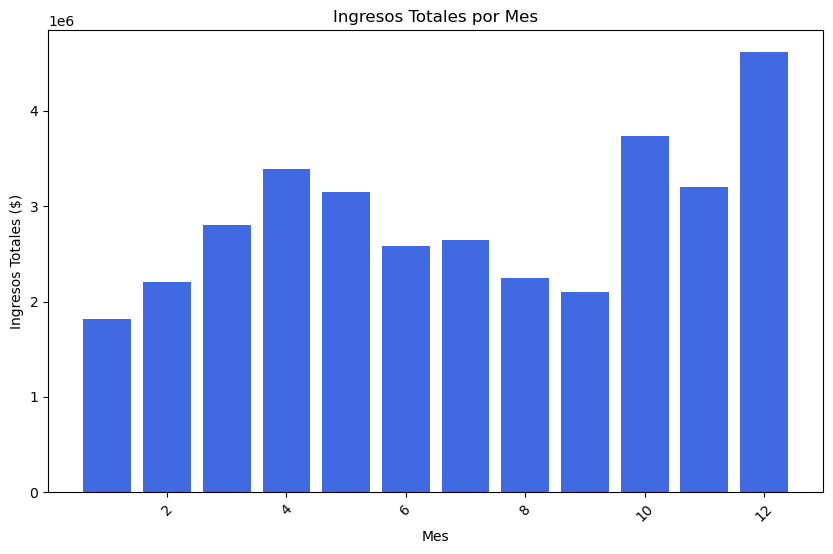

In [155]:
from pyspark.sql.functions import sum, col
import matplotlib.pyplot as plt
import pandas as pd

# Calcular ingresos por mes
df_revenue = df_ventas_2019.groupBy("Month").agg(
    sum(col("PriceEach") * col("QuantityOrdered")).alias("TotalRevenue")
).orderBy("TotalRevenue", ascending=False)

# Mostrar los resultados
df_revenue.show()

# Convertir a Pandas
df_revenue_pd = df_revenue.toPandas()

# Graficar
plt.figure(figsize=(10,6))
plt.bar(df_revenue_pd["Month"], df_revenue_pd["TotalRevenue"], color="royalblue")
plt.xlabel("Mes")
plt.ylabel("Ingresos Totales ($)")
plt.title("Ingresos Totales por Mes")
plt.xticks(rotation=45)
plt.show()

+--------------+--------------+
|          City|TotalUnitsSold|
+--------------+--------------+
| San Francisco|         50226|
|   Los Angeles|         33288|
| New York City|         27916|
|        Boston|         22524|
|        Dallas|         16728|
|       Atlanta|         16602|
|       Seattle|         16552|
|      Portland|         14051|
|        Austin|         11151|
+--------------+--------------+



/tmp/ipykernel_9352/1207775336.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_top_cities_pd["City"], x=df_top_cities_pd["TotalUnitsSold"], palette="viridis")


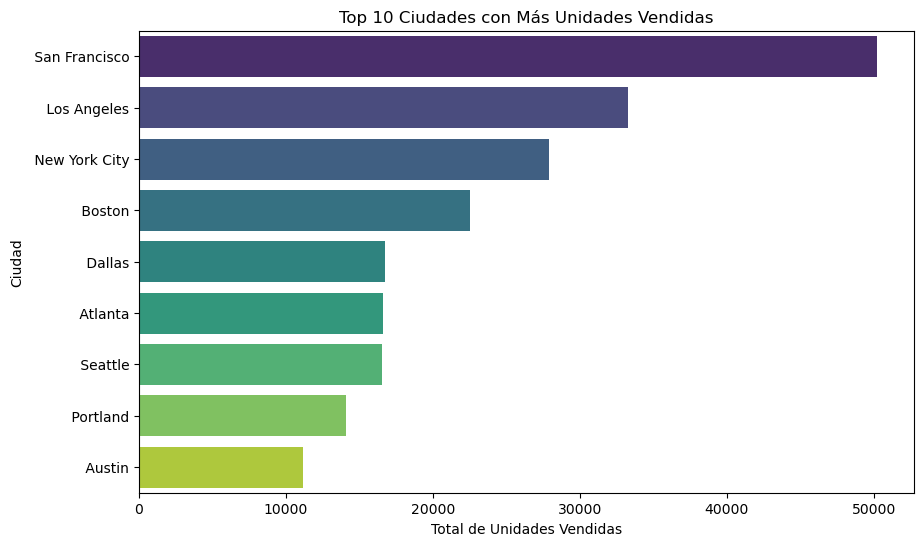

In [156]:
import seaborn as sns

df_top_cities = df_ventas_2019.groupBy("City").agg(
    sum("QuantityOrdered").alias("TotalUnitsSold")
).orderBy("TotalUnitsSold", ascending=False).limit(10)

# Mostrar el resultado
df_top_cities.show()

# Convertir a Pandas
df_top_cities_pd = df_top_cities.toPandas()

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(y=df_top_cities_pd["City"], x=df_top_cities_pd["TotalUnitsSold"], palette="viridis")
plt.xlabel("Total de Unidades Vendidas")
plt.ylabel("Ciudad")
plt.title("Top 10 Ciudades con Más Unidades Vendidas")
plt.show()


+----+-----------+
|Hour|TotalOrders|
+----+-----------+
|   0|        373|
|   1|        215|
|   2|        119|
|   3|         77|
|   4|         70|
|   5|        114|
|   6|        243|
|   7|        411|
|   8|        565|
|   9|        795|
|  10|       1017|
|  11|       1187|
|  12|       1202|
|  13|       1172|
|  14|       1012|
|  15|        929|
|  16|        986|
|  17|       1002|
|  18|       1142|
|  19|       1174|
+----+-----------+
only showing top 20 rows



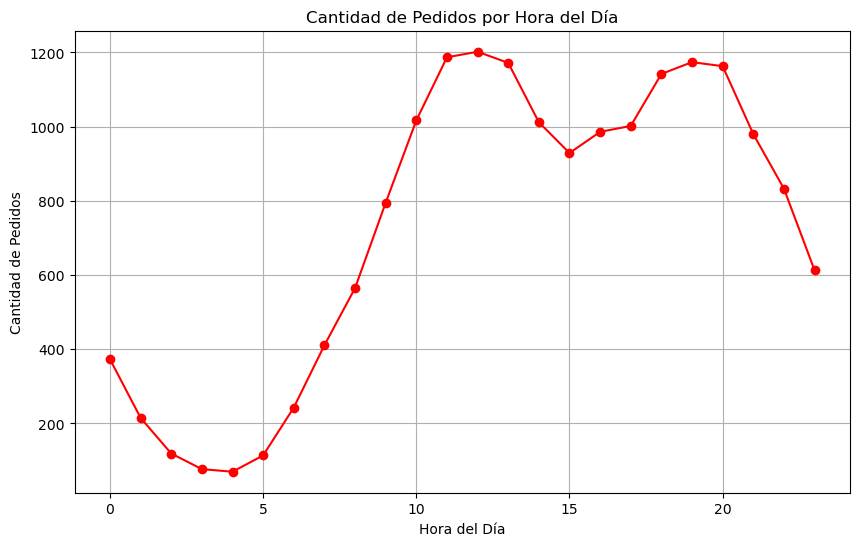

In [157]:
from pyspark.sql.functions import hour, count

# Filtrar pedidos con al menos dos productos
df_pedidos_hora = df_ventas_2019.filter(col("QuantityOrdered") >= 2)

# Extraer la hora del pedido
df_pedidos_hora = df_pedidos_hora.withColumn("Hour", hour(col("OrderDate")))

# Contar pedidos por hora
df_pedidos_hora_agg = df_pedidos_hora.groupBy("Hour").agg(count("*").alias("TotalOrders")).orderBy("Hour")

# Mostrar resultado
df_pedidos_hora_agg.show()

# Convertir a Pandas
df_pedidos_hora_pd = df_pedidos_hora_agg.toPandas()

# Graficar
plt.figure(figsize=(10,6))
plt.plot(df_pedidos_hora_pd["Hour"], df_pedidos_hora_pd["TotalOrders"], marker='o', linestyle='-', color='red')
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad de Pedidos")
plt.title("Cantidad de Pedidos por Hora del Día")
plt.grid()
plt.show()